# NEXT WORD PREDICTION USING SEQ2SEQ MODEL TENSORFLOW, KERAS, LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('/content/tmdb_5000_movies.csv')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
df = df['original_title']

In [4]:
df

,original_title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4798,El Mariachi
4799,Newlyweds
4800,"Signed, Sealed, Delivered"
4801,Shanghai Calling


In [5]:
movie_name = df.to_list()

In [6]:
movie_name

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [7]:
# Initializes a Tokenizer object from TensorFlow's Keras API. This tokenizer will be used to convert text data into sequences of integers.
tokenizer = tf.keras.preprocessing.text.Tokenizer()

#Fits the tokenizer on the provided movie names (movie_name). This step essentially builds the vocabulary based on the words in the movie names and assigns a unique integer index to each word.
tokenizer.fit_on_texts(movie_name)

#Converts the movie names into sequences of integers using the fitted tokenizer. Each word in the movie names is replaced by its corresponding integer index in the tokenizer's vocabulary. The resulting sequences are stored in the variable seq.
seq = tokenizer.texts_to_sequences(movie_name)

In [8]:
seq[:10]

[[1564],
 [210, 2, 1, 431, 47, 432, 72],
 [1565],
 [1, 52, 211, 1566],
 [212, 601],
 [213, 8, 21],
 [1567],
 [902, 146, 2, 1568],
 [110, 214, 4, 1, 433, 53, 147],
 [173, 340, 261, 85, 2, 903]]

In [9]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'and': 4,
 'in': 5,
 '2': 6,
 'to': 7,
 'man': 8,
 'i': 9,
 'love': 10,
 'with': 11,
 'on': 12,
 'me': 13,
 'my': 14,
 'movie': 15,
 'you': 16,
 'dead': 17,
 'last': 18,
 'for': 19,
 'from': 20,
 '3': 21,
 'good': 22,
 'big': 23,
 'day': 24,
 'house': 25,
 'ii': 26,
 'american': 27,
 'men': 28,
 'it': 29,
 'story': 30,
 'life': 31,
 'black': 32,
 'girl': 33,
 'all': 34,
 'out': 35,
 'time': 36,
 'night': 37,
 'is': 38,
 'world': 39,
 'days': 40,
 'star': 41,
 'part': 42,
 'new': 43,
 'de': 44,
 'little': 45,
 'la': 46,
 'at': 47,
 'up': 48,
 'an': 49,
 'die': 50,
 'city': 51,
 'dark': 52,
 'blood': 53,
 'game': 54,
 'one': 55,
 'red': 56,
 'blue': 57,
 'your': 58,
 'iii': 59,
 'kill': 60,
 'war': 61,
 'white': 62,
 'street': 63,
 'lost': 64,
 'christmas': 65,
 'legend': 66,
 'wild': 67,
 'how': 68,
 'road': 69,
 'boys': 70,
 'high': 71,
 'end': 72,
 'down': 73,
 'home': 74,
 'hard': 75,
 'boy': 76,
 'year': 77,
 'like': 78,
 'x': 79,
 'bad': 80,
 'do': 81

In [10]:
X = []
y = []
total_words_dropped = 0

for i in seq:
    if len(i) > 1:
        for index in range(1, len(i)):
            X.append(i[:index])
            y.append(i[index])
    else:
        total_words_dropped += 1

print("Total Single Words Dropped are:", total_words_dropped)

Total Single Words Dropped are: 1003


- preparing the data for training a neural network model. It creates sequences of input-output pairs from the sequences generated earlier.

-X = [] and y = []: Initialize empty lists X and y to store input sequences and corresponding output sequences respectively.

- total_words_dropped = 0: Initialize a counter to keep track of the total number of single-word sequences dropped.

- The loop iterates over each sequence i in seq (which contains the sequences of integers representing movie names).

- total_words_dropped = 0: Initialize a counter to keep track of the total number of single-word sequences dropped.

-The loop iterates over each sequence i in seq (which contains the sequences of integers representing movie names).

- Inside the loop, if the length of the sequence i is greater than 1, it means the sequence has more than one word, so it generates input-output pairs by sliding a window over the sequence. For each word in the sequence except the last one (i[:index]), it appends the subsequence i[:index] to X and the next word (i[index]) to y.

-If the length of the sequence is 1, it means it contains only a single word. In this case, it increments the total_words_dropped counter.

-Finally, it prints the total number of single-word sequences dropped.

- The purpose of this code seems to be to generate training data for a model where the input is a sequence of words and the output is the next word in the sequence. By sliding a window over each sequence, it creates multiple training examples from each original sequence, except for sequences that consist of only one word, which are dropped.



In [11]:
X[:10]

[[210],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 431],
 [210, 2, 1, 431, 47],
 [210, 2, 1, 431, 47, 432],
 [1],
 [1, 52],
 [1, 52, 211],
 [212]]

In [12]:
y[:10]

[2, 1, 431, 47, 432, 72, 52, 211, 1566, 601]

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [13]:
X

[[210],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 431],
 [210, 2, 1, 431, 47],
 [210, 2, 1, 431, 47, 432],
 [1],
 [1, 52],
 [1, 52, 211],
 [212],
 [213],
 [213, 8],
 [902],
 [902, 146],
 [902, 146, 2],
 [110],
 [110, 214],
 [110, 214, 4],
 [110, 214, 4, 1],
 [110, 214, 4, 1, 433],
 [110, 214, 4, 1, 433, 53],
 [173],
 [173, 340],
 [173, 340, 261],
 [173, 340, 261, 85],
 [173, 340, 261, 85, 2],
 [261],
 [1569],
 [1569, 2],
 [210],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 431],
 [210, 2, 1, 431, 17],
 [210, 2, 1, 431, 17, 435],
 [1],
 [1, 341],
 [8],
 [8, 2],
 [1],
 [1, 342],
 [1, 342, 2],
 [1, 342, 2, 602],
 [1, 342, 2, 602, 147],
 [1],
 [210],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 431],
 [210, 2, 1, 431, 12],
 [210, 2, 1, 431, 12, 437],
 [28],
 [28, 5],
 [28, 5, 32],
 [1],
 [1, 603],
 [1, 603, 1],
 [1, 603, 1, 262],
 [1, 603, 1, 262, 2],
 [1, 603, 1, 262, 2, 1],
 [1, 603, 1, 262, 2, 1, 263],
 [1],
 [1, 604],
 [1, 604, 213],
 [438],
 [1],
 [1, 603],
 [1, 603, 1],
 [1, 603, 1, 1574],
 [1, 603, 1

In [19]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)
X = np.array(X)
X.shape

(8483, 14)

In [20]:
y = tf.keras.utils.to_categorical(y)

In [21]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y.shape

(8483, 5045)

In [23]:
vocab_size = len(tokenizer.word_index) + 1

In [24]:
vocab_size

5045

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 14),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax'),
])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [32]:
model.fit(X, y, epochs=250)

Epoch 1/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0578 - loss: 7.1115
Epoch 2/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0813 - loss: 6.8099
Epoch 3/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0868 - loss: 6.6079
Epoch 4/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0961 - loss: 6.4337
Epoch 5/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0959 - loss: 6.3137
Epoch 6/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0974 - loss: 6.2399
Epoch 7/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0955 - loss: 6.1503
Epoch 8/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1025 - loss: 6.0235
Epoch 9/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1019 - loss: 5.9549
Epoch 10/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1010 - loss: 5.8872
Epoch 11/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1021 - loss: 5.8093
Epoch 12/250
266/266 ━━━━━━━━━━━━━━━━━

In [33]:
model.save('nwp.h5')

In [34]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


In [35]:
vocab_array = np.array(list(tokenizer.word_index.keys()))

In [36]:
vocab_array

array(['the', 'of', 'a', ..., 'signed', 'sealed', 'delivered'],
      dtype='<U14')

In [37]:
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [38]:
make_prediction("cloudy", 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
['macs' 'bet' 'enemies' ... 'thou' 'from' 'in']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
['ado' 'service' 'femmes' ... 'us' 'heaven' 'her']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
['caddy' 'borders' 'hutch' ... 'dangerous' 'affection' 'eye']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
['gale' 'leopold' 'arc' ... 'me' 'up' 'in']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
['traffic' 'becomes' 'happyness' ... '3' 'with' 'to']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
['wolfman' 'treader' 'harbor' ... 'zile' '40' 'get']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
['row' 'morris' 'guerre' ... 'do' 'my' '2']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
['honey' 'mussolini' 'campus' ... '

'cloudy on a invisible man 2 hell the final nightmare ever'

In [ ]:
make_prediction("mars", 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
['madison' 'attached' 'strings' ... "'em" 'mann' 'pitch']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
['powerful' 'joneses' 'crystal' ... 'jesse' 'doo' 'gantry']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
['rule' 'confidential' 'patient' ... 'a' 'with' 'wilder']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
['areia' 'guffman' 'front' ... 'go' 'sinatra' 'canela']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
['tang' 'sol' 'areia' ... 'warriors' 'york' 'night']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
['brasil' 'england' 'seuil' ... 'die' 'say' 'can']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
['hedge' 'clayton' 'marlboro' ... 'say' 'and' 'go']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
['co

'mars attacks nuit pum die hard together were afraid to iwo'

In [2]:
# -*- coding: utf-8 -*-
"""
NEXT WORD PREDICTION USING SEQ2SEQ MODEL (LSTM)
Dataset: TMDB 5000 Movie Titles
Author: Tanmay + ChatGPT
"""

# ================== IMPORTS ==================
import pandas as pd
import numpy as np
import tensorflow as tf
import gradio as gr

# ================== LOAD DATA ==================
df = pd.read_csv("/content/tmdb_5000_movies.csv")
titles = df['original_title'].astype(str).tolist()
print(f"Loaded {len(titles)} movie titles")

# ================== TOKENIZATION ==================
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(titles)
sequences = tokenizer.texts_to_sequences(titles)

# Generate training data (X, y)
X, y = [], []
for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[:i])
        y.append(seq[i])

# Pad sequences
X = tf.keras.preprocessing.sequence.pad_sequences(X)
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")
print(f"Training samples: {X.shape[0]}")

# ================== BUILD MODEL ==================
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 50, input_length=X.shape[1]),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# ================== TRAIN MODEL ==================
history = model.fit(X, y, epochs=50, batch_size=128, verbose=1)

# Save model
model.save("next_word_model.h5")

# ================== PREDICTION FUNCTION ==================
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}

def predict_next_words(seed_text, num_words=5, top_k=3):
    """Generate next words from a given seed text"""
    output_text = seed_text
    for _ in range(num_words):
        token_seq = tokenizer.texts_to_sequences([output_text])[0]
        token_seq = tf.keras.preprocessing.sequence.pad_sequences([token_seq], maxlen=X.shape[1])

        preds = model.predict(token_seq, verbose=0)[0]
        top_indices = preds.argsort()[-top_k:][::-1]  # top-k predictions
        next_word = reverse_word_index.get(top_indices[0], "")
        output_text += " " + next_word
    return output_text

# ================== GRADIO FRONTEND ==================
def gradio_predict(seed, words, topk):
    return predict_next_words(seed, num_words=words, top_k=topk)

demo = gr.Interface(
    fn=gradio_predict,
    inputs=[
        gr.Textbox(label="Seed Text", placeholder="Enter starting words..."),
        gr.Slider(1, 20, value=5, step=1, label="Number of words to predict"),
        gr.Slider(1, 5, value=3, step=1, label="Top-k predictions considered")
    ],
    outputs=gr.Textbox(label="Predicted Sequence"),
    title="🎬 Next Word Prediction with LSTM",
    description="Train on TMDB movie titles. Enter a seed word to generate new titles!"
)

demo.launch(share=True)


Loaded 4803 movie titles
Vocabulary size: 5045
Training samples: 8483


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0486 - loss: 8.1133
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0629 - loss: 7.1805
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0576 - loss: 7.0903
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0612 - loss: 6.9595
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0652 - loss: 6.8615
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0871 - loss: 6.7011
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0852 - loss: 6.6021
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0904 - loss: 6.4105
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0979 - loss: 6.2613
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0980 - loss: 6.1752
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1053 - loss: 6.1322
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5878433ca490ba6e07.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
# Install dependencies (quiet mode)
!pip install --quiet tensorflow gradio matplotlib


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import gradio as gr


In [3]:
# Load TMDB dataset (make sure csv is uploaded in Colab or Drive)
df = pd.read_csv("/content/tmdb_5000_movies.csv")
titles = df['original_title'].astype(str).tolist()
print(f"Loaded {len(titles)} movie titles")


Loaded 4803 movie titles


In [4]:
# Tokenize titles
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(titles)
sequences = tokenizer.texts_to_sequences(titles)

# Build training pairs
X, y = [], []
for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[:i])
        y.append(seq[i])

# Pad input sequences
X = tf.keras.preprocessing.sequence.pad_sequences(X)
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1)

vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)
print("Training samples:", X.shape[0])


Vocabulary size: 5045
Training samples: 8483


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=X.shape[1]),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X, y,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

model.save("next_word_model.h5")


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0594 - loss: 8.1468 - val_accuracy: 0.0412 - val_loss: 7.8456
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0561 - loss: 7.1445 - val_accuracy: 0.0530 - val_loss: 8.0403
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0662 - loss: 7.0031 - val_accuracy: 0.0530 - val_loss: 8.1030
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0644 - loss: 6.8747 - val_accuracy: 0.0412 - val_loss: 8.1250
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0621 - loss: 6.8099 - val_accuracy: 0.0565 - val_loss: 8.3339
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0705 - loss: 6.7012 - val_accuracy: 0.0707 - val_loss: 8.5336
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0894 - loss: 6.5806 - val_accuracy: 0.0718 - val_loss: 8.6239
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0881 - loss: 6.4572 - val_accuracy: 0.0742 - v

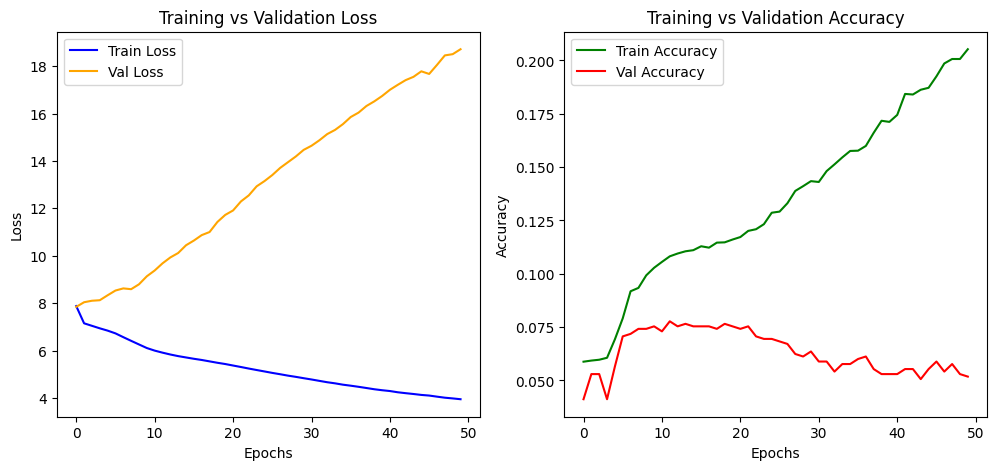

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss", color="blue")
plt.plot(history.history['val_loss'], label="Val Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy", color="green")
plt.plot(history.history['val_accuracy'], label="Val Accuracy", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()


In [9]:
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}

def predict_next_words(seed_text, num_words=5, top_k=3):
    output_text = seed_text
    for _ in range(num_words):
        token_seq = tokenizer.texts_to_sequences([output_text])[0]
        token_seq = tf.keras.preprocessing.sequence.pad_sequences([token_seq], maxlen=X.shape[1])

        preds = model.predict(token_seq, verbose=0)[0]
        top_indices = preds.argsort()[-top_k:][::-1]

        # Pick the best word
        next_word = reverse_word_index.get(top_indices[0], "")
        output_text += " " + next_word
    return output_text


In [10]:
css = """
.container { background: linear-gradient(135deg, #0f172a, #1e293b);
             border-radius: 16px; padding: 20px; }
h1 { color: #f1f5f9; font-family: 'Segoe UI', sans-serif; text-align:center; }
p { color: #94a3b8; text-align:center; }
"""

def gradio_predict(seed, words, topk):
    return predict_next_words(seed, num_words=words, top_k=topk)

with gr.Blocks(css=css, analytics_enabled=False) as demo:
    with gr.Column(elem_classes="container"):
        gr.Markdown("<h1>🎬 Next Word Generator (LSTM)</h1><p>Trained on TMDB 5000 Movie Titles</p>")
        seed = gr.Textbox(label="Seed Text", placeholder="Enter starting words...")
        words = gr.Slider(1, 20, value=5, step=1, label="Number of words to generate")
        topk = gr.Slider(1, 5, value=3, step=1, label="Top-k predictions")
        output = gr.Textbox(label="Generated Text")
        btn = gr.Button("✨ Predict Next Words")
        btn.click(gradio_predict, inputs=[seed, words, topk], outputs=output)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://573b69ddbdfb11e41b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
